# BUILDING A RECOMMENDATION SYSTEM FOR ELECTRONICS PRODUCT OF AN ECOMMERCE WEBSITE

## Background :

This type of filtering matches each of the user's purchased and rated items to similar items, then combines those similar items into a recommendation list for the users. This type of filtering matches each of the user's purchased and rated items to similar items, then combines those similar items into a recommendation list for the user. The Objective of using recommendation system is to recommend the relevant product and services to increase the revenue per users. Here in this project we are going to build a recommendation model for the electronics products on the dataset shared by Amazon.

## Dataset :

The dataset has several data but we will be only focusing on electronic data for our recommendation system. The dataset has four columns containing the information of userId, productId, ratings and timestamp. 
Here is the link of the dataset : http://jmcauley.ucsd.edu/data/amazon

## Steps :
We are going to perform following steps as part of our recommendation project   
a. Data import and cleaning (subset data)  
b. Train/test dataset creation  
c. Building a recommendation system   
d. Model evalution and best model selection  

## SEC 1. Importing relevant libraries and dataset

In [219]:
# Checking the current working directory
import os
cwd = os.getcwd()
cwd

'C:\\Users\\user\\Desktop\\Great Learning\\Recommendation System'

In [220]:
# Changing the directory of the dataset
os.chdir("C:/Users/user/Desktop/Great Learning/Recommendation System")

In [221]:
# Importing the libraries
%matplotlib inline
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
import Recommenders as Recommenders
import Evaluation as Evaluation

In [222]:
# Importing the dataset
ecom_df = pd.read_csv ("C:/Users/user/Desktop/Great Learning/Recommendation System/ratings_Electronics.csv")

In [223]:
# View of the dataset
ecom_df.head() # Dataset doesn't have any column name. We have assign the column name for the dataset

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [224]:
# Assigning the name of the columns
ecom_df.columns = ["UserID", "ProductID", "Rating", "Timestamp"]

In [225]:
ecom_df.head()

,UserID,ProductID,Rating,Timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [226]:
ecom_df.dtypes

UserID        object
ProductID     object
Rating       float64
Timestamp      int64
dtype: object

In [227]:
ecom_df[ecom_df["ProductID"]=='0439886341']
# The particular product "0439886341" purchased by 3 users

,UserID,ProductID,Rating,Timestamp
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


## SEC.2 Exploratory analysis of the data

In [228]:
ecom_df.shape # The dataset has more 78 lakhs of observations

(7824481, 4)

In [229]:
# Checking for unique UserID and ProductID
Total_users = len(ecom_df ["UserID"].unique())
Total_product = len(ecom_df["ProductID"].unique())

In [230]:
print("Number of users :", Total_users)
print("Number of product :", Total_product)
# The total number of users is more than 42 lakhs and much higher than total unique product count (> 4.7 lakhs)

Number of users : 4201696
Number of product : 476001


In [231]:
# Checking the presence of null value
Null = ecom_df.isnull().sum()
print ('Number of missing value across columns :\n', Null)
# Dataset does not have any missing value

Number of missing value across columns :
 UserID       0
ProductID    0
Rating       0
Timestamp    0
dtype: int64


In [232]:
# Checking the summary of the dataset
ecom_df.describe().transpose()
# "Rating" is left skewed, i.e. majority of the observations having lower ratings

,count,mean,std,min,25%,50%,75%,max
Rating,7824481.0,4.012337e+00,1.380910e+00,1.0,3.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
Timestamp,7824481.0,1.338178e+09,6.900426e+07,912729600.0,1.315354e+09,1.361059e+09,1.386115e+09,1.406074e+09


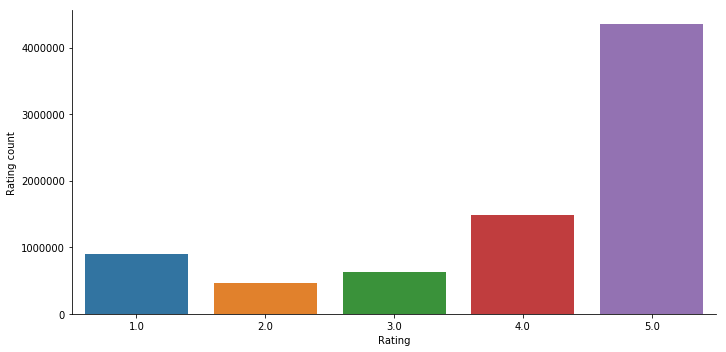

In [233]:
# Distribution of Ratings
d = sns.factorplot("Rating", data = ecom_df, kind = 'count', aspect = 2.0)
d.set_ylabels ("Rating count")

In [234]:
# Top product based on number of users
Top_product = ecom_df.groupby("ProductID").size().sort_values(ascending = False)[:10]
Top_product

ProductID
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
B003ELYQGG    11617
B003ES5ZUU    10276
B007R5YDYA     9907
B00622AG6S     9823
B0002L5R78     9487
dtype: int64

In [235]:
ecom_df[ecom_df["ProductID"]=="B0074BW614"].count()

UserID       18244
ProductID    18244
Rating       18244
Timestamp    18244
dtype: int64

In [236]:
# Showing popular 10 product (% contribution)
product_grouped = ecom_df.groupby(['ProductID']).agg({'Rating': 'count'}).reset_index()
grouped_sum = product_grouped['Rating'].sum()
print(grouped_sum)
product_grouped['Percentage']  = product_grouped['Rating'].div(grouped_sum)*100
product_grouped.sort_values(['Rating', 'ProductID'], ascending = [0,1])[:10]

7824481


,ProductID,Rating,Percentage
308397,B0074BW614,18244,0.233166
429571,B00DR0PDNE,16454,0.210289
327307,B007WTAJTO,14172,0.181124
102803,B0019EHU8G,12285,0.157007
296624,B006GWO5WK,12226,0.156253
178600,B003ELYQGG,11617,0.148470
178812,B003ES5ZUU,10276,0.131331
323012,B007R5YDYA,9907,0.126615
289774,B00622AG6S,9823,0.125542
30275,B0002L5R78,9487,0.121248


In [237]:
# Top user based on number of rating they provided
Top_user = ecom_df.groupby("UserID").size().sort_values(ascending = False)[:10]
Top_user

UserID
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
dtype: int64

In [238]:
ecom_df.shape

(7824481, 4)

## SEC 3. Data cleaning and preparation

In [239]:
# Dropping the Timestamp variables
ecom_df1 = ecom_df.drop("Timestamp", axis=1)

In [240]:
ecom_df1.head()

,UserID,ProductID,Rating
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


###### We will create a subset of the original data, since more than 4.7 lakhs of unique product is present in the dataset. Will only consider the users who rated the product more than 50 times (selected randomly)

In [241]:
counts = ecom_df1["UserID"].value_counts() # counts is equavalent to the number of product the particular user rated
df_final = ecom_df1[ecom_df1["UserID"].isin(counts[counts>=50].index)]

In [242]:
df_final.shape

(125871, 3)

In [243]:
# Preparation of Training and test dataset
train_data, test_data = train_test_split(df_final, test_size = 0.25, random_state=123) # Spliting the dataset in-ratio of 3:1
train_data.head()

,UserID,ProductID,Rating
3554829,A3NKRH3TJ4DPVI,B003TU9V0S,5.0
5734438,AONUCJBC85BL,B007FPIQ3Q,4.0
6627602,A3L6L5O89JTX2T,B009I5KWLK,4.0
3687024,A2IT7S59GSASN7,B003YKG2UK,5.0
7680121,AZMY6E8B52L2T,B00G537M7K,5.0


## SEC 4. Model Development

### 4.1 Popularity based recommendation system

In [244]:
# We will consider the popularity of the product based on the user count i.e. how many users liked this particular product. 
# Higher the user count, more popular the product is.

In [245]:
train_data_grouped = train_data.groupby('ProductID').agg({'UserID' : 'count'}).reset_index()
train_data_grouped.rename(columns={'UserID':'score'}, inplace=True)
train_data_grouped.head()

,ProductID,score
0,0594451647,1
1,0594481813,1
2,0970407998,1
3,0972683275,3
4,1400501466,4


In [246]:
train_data_sort = train_data_grouped.sort_values(['score', 'ProductID'], ascending = [0,1])

In [247]:
train_data_sort["Rank"]=train_data_sort['score'].rank(ascending=0, method='first')

In [248]:
train_data_sort.head()

,ProductID,score,Rank
32312,B0088CJT4U,153,1.0
20497,B003ES5ZUU,139,2.0
31697,B007WTAJTO,122,3.0
31993,B00829TIEK,121,4.0
9059,B000N99BBC,119,5.0


In [249]:
popularity_recommendations = train_data_sort.head(10)
popularity_recommendations

,ProductID,score,Rank
32312,B0088CJT4U,153,1.0
20497,B003ES5ZUU,139,2.0
31697,B007WTAJTO,122,3.0
31993,B00829TIEK,121,4.0
9059,B000N99BBC,119,5.0
32596,B008DWCRQW,101,6.0
31989,B00829THK0,98,7.0
23768,B004CLYEDC,95,8.0
18124,B002R5AM7C,87,9.0
18307,B002SZEOLG,87,10.0


In [250]:
# Making the prediction with popularity based recommendation system
def recommender (userid):
    user_recommendation = popularity_recommendations
    user_recommendation["UserID"]=userid
    cols = user_recommendation.columns.tolist()
    cols=cols[-1:] + cols [:-1]
    user_recommendation = user_recommendation[cols]
    return user_recommendation

In [321]:
user_list = [1,10] # Creation of object for list of users
for i in user_list :
    print ("Here is the recommendation for the user Number: %d\n" %(i))
    print(recommender(i))
    print("\n")

Here is the recommendation for the user Number: 1

       UserID   ProductID  score  Rank
32312       1  B0088CJT4U    153   1.0
20497       1  B003ES5ZUU    139   2.0
31697       1  B007WTAJTO    122   3.0
31993       1  B00829TIEK    121   4.0
9059        1  B000N99BBC    119   5.0
32596       1  B008DWCRQW    101   6.0
31989       1  B00829THK0     98   7.0
23768       1  B004CLYEDC     95   8.0
18124       1  B002R5AM7C     87   9.0
18307       1  B002SZEOLG     87  10.0


Here is the recommendation for the user Number: 10

       UserID   ProductID  score  Rank
32312      10  B0088CJT4U    153   1.0
20497      10  B003ES5ZUU    139   2.0
31697      10  B007WTAJTO    122   3.0
31993      10  B00829TIEK    121   4.0
9059       10  B000N99BBC    119   5.0
32596      10  B008DWCRQW    101   6.0
31989      10  B00829THK0     98   7.0
23768      10  B004CLYEDC     95   8.0
18124      10  B002R5AM7C     87   9.0
18307      10  B002SZEOLG     87  10.0




###### Since the popularity based recommendation system only based on the popularity i.e. how many user actully liked / rated this product, this will give the top 5 or 10 (based on user selection) purely based on the occurnace / frequency of the product in the dataset. The top product might change if we have different dataset and this model cann't recommend the product based on individual's interest. 

### 4.2. Collaborative Filtering model

###### Df_final is the final dataset contains the informations about the users who haved rated 50 or more product

In [253]:
df_final.shape

(125871, 3)

In [254]:
# Creation of product rating matrix
rating_matrix = df_final.pivot(index = "UserID", columns = "ProductID", values = "Rating").fillna(0)
print("Number of rows and columns in final rating matrix:", rating_matrix.shape)

Number of rows and columns in final rating matrix: (1540, 48190)


In [255]:
rating_matrix.head()

ProductID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
UserID,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [257]:
# Creating a copy of rating matrix for model evalution
rating_matrix_final = rating_matrix.copy()
rating_matrix_final.head()

ProductID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
UserID,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [258]:
# Setting up the index for users
rating_matrix ["User_index"]=np.arange (0, rating_matrix.shape[0],1)
rating_matrix.set_index(["User_index"], inplace = True)
rating_matrix.head()

ProductID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
User_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [259]:
# Total rating count provided by the user
Total_rating_provided=np.count_nonzero(rating_matrix)
print("Total rating provided by the users:",Total_rating_provided)

Total rating provided by the users: 125871


In [260]:
# Maxiumm possible rating
maximum_possible_rating = rating_matrix.shape[0] * rating_matrix.shape[1]
print( "Maximum possible rating :",maximum_possible_rating )

Maximum possible rating : 74212600


In [261]:
# Calculating the rating density
rating_propensity = (Total_rating_provided/maximum_possible_rating)*100
print ("propensity of the user rating: {:4.2f}%".format(rating_propensity))

propensity of the user rating: 0.17%


##### Since the dataset is too sparse, we will going to use SVD for decomposition 

### SVD Method

In [264]:
# Importing library for SVD
from scipy.sparse.linalg import svds

In [265]:
# Applying SVD to the data set
U, sigma, Vt = svds(rating_matrix, k=10)

In [266]:
# Diagonal array matrix of sigma
sigma = np.diag(sigma)
sigma

array([[ 87.43474122,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  88.68897677,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  91.15027972,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,  92.15989229,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         95.03789667,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  98.21626326,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  

In [267]:
# User predicted rating matrix
user_predicted_ratings = np.dot(np.dot(U,sigma),Vt)

In [268]:
# User predicted data frame
predicted_df = pd.DataFrame(user_predicted_ratings, columns = rating_matrix.columns)
predicted_df.head()

ProductID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.002661,0.003576,0.004050,0.006906,0.003967,0.003073,0.005782,0.000568,0.014386,0.002708,...,6.108890e-04,0.044224,0.002919,0.060347,-0.002137,0.006751,0.001525,0.130951,0.059243,0.015014
1,0.002262,0.002505,0.005136,0.016517,0.007120,0.001438,0.013258,0.000335,-0.003781,0.001190,...,2.024793e-04,0.029213,0.000010,0.000244,-0.003111,-0.000621,0.004409,-0.039241,-0.006889,0.003696
2,-0.001600,-0.002502,0.002186,0.016742,0.006716,-0.002113,0.005805,0.003497,-0.005009,-0.001588,...,-3.240446e-04,0.009180,-0.002459,-0.016922,0.019936,-0.002483,-0.000155,-0.002889,-0.011522,-0.004525
3,0.002732,0.003867,0.001799,0.009395,0.004075,0.002778,0.003507,0.000095,0.007983,0.002381,...,6.031462e-04,-0.003369,0.003433,-0.003428,-0.000750,0.000119,0.002612,-0.015107,-0.006740,0.003276
4,0.000704,0.000085,0.002051,0.009664,0.004438,0.000335,0.005992,0.001056,-0.000369,0.000373,...,3.745108e-08,-0.001140,-0.000323,-0.025215,0.004700,-0.002170,0.001263,-0.048555,-0.016301,-0.003377


In [269]:
# Recommend the items with the highest predicted ratings

def recommended_items (UserID, rating_matrix, predited_df, recommendation_number):
    user_index1 = UserID -1 # As user index started from 0 and first row is the header information
    user_rating_sorted = rating_matrix.iloc[user_index1].sort_values(ascending=False)
    user_predictions_sorted = predicted_df.iloc[user_index1].sort_values(ascending=False)
    combined = pd.concat([user_rating_sorted,user_predictions_sorted], axis = 1)
    combined.index.name = "Recommended Product"
    combined.columns = ["User_rating", "User_prediction"]
    combined = combined.loc[combined.User_rating==0]
    combined = combined.sort_values("User_prediction", ascending = False)
    print("\n Below are the recommendation for the user (user_id = {}) :\n".format(UserID))
    print(combined.head(recommendation_number))


In [320]:
# Enter "UserID" and recommendation_number for the user to predict the product
UserID = 1
recommendation_number = 10
recommended_items (UserID, rating_matrix, predited_df, recommendation_number)

# Predicting the user rating for those who does not provide any rating


 Below are the recommendation for the user (user_id = 1) :

                     User_rating  User_prediction
Recommended Product                              
B003ES5ZUU                   0.0         1.087660
B007WTAJTO                   0.0         0.880925
B007OY5V68                   0.0         0.663511
B00G4UQ6U8                   0.0         0.634777
B002V88HFE                   0.0         0.574183
B000JMJWV2                   0.0         0.551876
B00DTZYHX4                   0.0         0.543192
B001TH7GUU                   0.0         0.527631
B002WE6D44                   0.0         0.520600
B002WE4HE2                   0.0         0.514437


## SEC 5. Model Evalution

##### Will compute teh RMSE (root mean square error) to compute the model performance

In [277]:
# Calling the final rating matrix
rating_matrix_final.head()

ProductID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
UserID,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [279]:
# Mean value of actual rating for first 5 products
rating_matrix_final.mean().head()

ProductID
0594451647    0.003247
0594481813    0.001948
0970407998    0.003247
0972683275    0.012338
1400501466    0.012987
dtype: float64

In [282]:
# Calling the predicted rating dataframe
predicted_df.head()

ProductID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.002661,0.003576,0.004050,0.006906,0.003967,0.003073,0.005782,0.000568,0.014386,0.002708,...,6.108890e-04,0.044224,0.002919,0.060347,-0.002137,0.006751,0.001525,0.130951,0.059243,0.015014
1,0.002262,0.002505,0.005136,0.016517,0.007120,0.001438,0.013258,0.000335,-0.003781,0.001190,...,2.024793e-04,0.029213,0.000010,0.000244,-0.003111,-0.000621,0.004409,-0.039241,-0.006889,0.003696
2,-0.001600,-0.002502,0.002186,0.016742,0.006716,-0.002113,0.005805,0.003497,-0.005009,-0.001588,...,-3.240446e-04,0.009180,-0.002459,-0.016922,0.019936,-0.002483,-0.000155,-0.002889,-0.011522,-0.004525
3,0.002732,0.003867,0.001799,0.009395,0.004075,0.002778,0.003507,0.000095,0.007983,0.002381,...,6.031462e-04,-0.003369,0.003433,-0.003428,-0.000750,0.000119,0.002612,-0.015107,-0.006740,0.003276
4,0.000704,0.000085,0.002051,0.009664,0.004438,0.000335,0.005992,0.001056,-0.000369,0.000373,...,3.745108e-08,-0.001140,-0.000323,-0.025215,0.004700,-0.002170,0.001263,-0.048555,-0.016301,-0.003377


In [284]:
# Predicted mean rating value of first 5 products
predicted_df.mean().head()

ProductID
0594451647    0.001542
0594481813    0.002341
0970407998    0.002597
0972683275    0.011807
1400501466    0.004848
dtype: float64

In [311]:
# Calculating the RMSE (root mean square error)
combined_df = pd.concat([rating_matrix_final.mean(),predicted_df.mean()], axis=1)

In [312]:
combined_df.head()

,0,1
ProductID,,
0594451647,0.003247,0.001542
0594481813,0.001948,0.002341
0970407998,0.003247,0.002597
0972683275,0.012338,0.011807
1400501466,0.012987,0.004848


In [313]:
combined_df.columns = ["Mean_actual_rating", "Mean_predicted_rating"]
print("Row and columns number of the combined dataframe:", combined_df.shape)

Row and columns number of the combined dataframe: (48190, 2)


In [314]:
# Assigning an index for the prodcut
combined_df["Product_index"]=np.arange(0, combined_df.shape[0], 1)
combined_df.head()

,Mean_actual_rating,Mean_predicted_rating,Product_index
ProductID,,,
0594451647,0.003247,0.001542,0
0594481813,0.001948,0.002341,1
0970407998,0.003247,0.002597,2
0972683275,0.012338,0.011807,3
1400501466,0.012987,0.004848,4


In [316]:
# RMSE value
RMSE_value = round((((combined_df.Mean_actual_rating - combined_df.Mean_predicted_rating)**2).mean()** 0.5),4)
print("RMSE of the SVD model is :", RMSE_value)

RMSE of the SVD model is : 0.0033


In [319]:
# Enter "UserID" and recommendation_number for the user to predict the product
UserID = 12 # Change the UserID to see the recommendation for differenct users
recommendation_number = 5 #(Will be interested to see the top 5 products)
recommended_items (UserID, rating_matrix, predited_df, recommendation_number)


 Below are the recommendation for the user (user_id = 12) :

                     User_rating  User_prediction
Recommended Product                              
B0088CJT4U                   0.0         1.639356
B000N99BBC                   0.0         1.328095
B00829TIEK                   0.0         1.269074
B008DWCRQW                   0.0         1.145459
B004CLYEDC                   0.0         1.125218


## SEC 6. Conclusion

Popularity based model is only recommend the product based on the frequency i.e. how many users actaully liked or rated this product. It will take the count of that and show the top 5 or 10 products ( based on user selection) as a recommended items. The product recommendated by this system will be same for all the users.  

On the other hand, in collaborating filtering approach, the Product will be recommended to the users based on his/her past history/informations, like the rating he/she provided on different products etc. It will be more personalised recommendation compared to generic recommendation of popularity based model.  

The model is performing quite good, since the RMSE value is 0.0033. We can explore other model as-well like Hybrid and check how the models are performing. And then best model can be selected based on the model performance.